
Alunos:
  * Arthur Breno dos Reis Paula - 12547382
  * Fernando - 8556609
  * Mateus Israel Silva - 11735042

# Desafio: **Porto Seguro's Safe Driver Prediction**

OBJETIVO:
 - Calcular a probabilidade de um seguro automotivo ser acionado

# Biliotecas importadas

In [1]:
## Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imputção de dados
from sklearn.impute import KNNImputer

## Decomposição
from sklearn.decomposition import PCA

## Pre processamento
from sklearn.preprocessing import StandardScaler

Configuração gráfica

In [2]:
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

Importação dos dados

In [4]:
path_train = '/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_porto_seguro_driver/train.csv'
path_test = '/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_porto_seguro_driver/test.csv'

In [5]:
dados_brutos = pd.read_csv(path_train)
dados_brutos_teste = pd.read_csv(path_test)

---

# Análise Exploratória


## Informações básicas

Nomes das colunas:
 - bin: binário
 - cat: categóricas
 - sem nenhum é contínuo ou ordinal
 - Valores -1 indicam dados faltantes
 - coluna target é aquela que identifica se o seguro foi utilizado ou não


In [6]:
dados_brutos.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [7]:
n_linhas, n_cols = dados_brutos.shape
print('Número de linhas:', n_linhas)
print('Número de colunas:', n_cols)
print('Sendo uma de identificação e outra a target,\nrestando um total de 57 colunas de atributos')


Número de linhas: 595212
Número de colunas: 59
Sendo uma de identificação e outra a target,
restando um total de 57 colunas de atributos


In [8]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

Colunas Binárias

In [9]:
dados_brutos.filter(like='bin').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ps_ind_06_bin   595212 non-null  int64
 1   ps_ind_07_bin   595212 non-null  int64
 2   ps_ind_08_bin   595212 non-null  int64
 3   ps_ind_09_bin   595212 non-null  int64
 4   ps_ind_10_bin   595212 non-null  int64
 5   ps_ind_11_bin   595212 non-null  int64
 6   ps_ind_12_bin   595212 non-null  int64
 7   ps_ind_13_bin   595212 non-null  int64
 8   ps_ind_16_bin   595212 non-null  int64
 9   ps_ind_17_bin   595212 non-null  int64
 10  ps_ind_18_bin   595212 non-null  int64
 11  ps_calc_15_bin  595212 non-null  int64
 12  ps_calc_16_bin  595212 non-null  int64
 13  ps_calc_17_bin  595212 non-null  int64
 14  ps_calc_18_bin  595212 non-null  int64
 15  ps_calc_19_bin  595212 non-null  int64
 16  ps_calc_20_bin  595212 non-null  int64
dtypes: int64(17)
memory usage: 77.2 MB


Colunas categóricas

In [10]:
dados_brutos.filter(like='cat').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   ps_ind_02_cat  595212 non-null  int64
 1   ps_ind_04_cat  595212 non-null  int64
 2   ps_ind_05_cat  595212 non-null  int64
 3   ps_car_01_cat  595212 non-null  int64
 4   ps_car_02_cat  595212 non-null  int64
 5   ps_car_03_cat  595212 non-null  int64
 6   ps_car_04_cat  595212 non-null  int64
 7   ps_car_05_cat  595212 non-null  int64
 8   ps_car_06_cat  595212 non-null  int64
 9   ps_car_07_cat  595212 non-null  int64
 10  ps_car_08_cat  595212 non-null  int64
 11  ps_car_09_cat  595212 non-null  int64
 12  ps_car_10_cat  595212 non-null  int64
 13  ps_car_11_cat  595212 non-null  int64
dtypes: int64(14)
memory usage: 63.6 MB


In [11]:
cols_cat = dados_brutos.filter(like='cat').columns

# Imprimir as classes para os dados categóricos
for col_cat in cols_cat:
  print(col_cat, sorted(dados_brutos[col_cat].unique()))

ps_ind_02_cat [np.int64(-1), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
ps_ind_04_cat [np.int64(-1), np.int64(0), np.int64(1)]
ps_ind_05_cat [np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
ps_car_01_cat [np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11)]
ps_car_02_cat [np.int64(-1), np.int64(0), np.int64(1)]
ps_car_03_cat [np.int64(-1), np.int64(0), np.int64(1)]
ps_car_04_cat [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
ps_car_05_cat [np.int64(-1), np.int64(0), np.int64(1)]
ps_car_06_cat [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.i

Colunas ordinais

In [12]:
dados_brutos.filter(regex='^(?!.*(_cat|_bin)$).*').select_dtypes(include='int64').head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,7,0,2,5,0,11,2,3,1,10,1,10,1,5,9,1,5,8
1,9,0,1,7,0,3,3,2,1,9,5,8,1,7,3,1,1,9
2,13,0,5,9,0,12,1,2,2,9,1,8,2,7,4,2,7,7
3,16,0,0,2,0,8,1,2,4,7,1,8,4,2,2,2,4,9
4,17,0,0,0,0,9,3,2,2,6,3,10,2,12,3,1,1,3


In [13]:
dados_brutos.filter(regex='^(?!.*(_cat|_bin)$).*').select_dtypes(include='int64').info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   id          595212 non-null  int64
 1   target      595212 non-null  int64
 2   ps_ind_01   595212 non-null  int64
 3   ps_ind_03   595212 non-null  int64
 4   ps_ind_14   595212 non-null  int64
 5   ps_ind_15   595212 non-null  int64
 6   ps_car_11   595212 non-null  int64
 7   ps_calc_04  595212 non-null  int64
 8   ps_calc_05  595212 non-null  int64
 9   ps_calc_06  595212 non-null  int64
 10  ps_calc_07  595212 non-null  int64
 11  ps_calc_08  595212 non-null  int64
 12  ps_calc_09  595212 non-null  int64
 13  ps_calc_10  595212 non-null  int64
 14  ps_calc_11  595212 non-null  int64
 15  ps_calc_12  595212 non-null  int64
 16  ps_calc_13  595212 non-null  int64
 17  ps_calc_14  595212 non-null  int64
dtypes: int64(18)
memory usage: 81.7 MB


In [14]:
cols_ord = dados_brutos.filter(regex='^(?!.*(_cat|_bin)$).*').select_dtypes(include='int64').columns

# Imprimir os valores para os dados ordinais
for col_ord in cols_ord:
  if col_ord != 'id':
    print(col_ord, sorted(dados_brutos[col_ord].unique()))

target [np.int64(0), np.int64(1)]
ps_ind_01 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
ps_ind_03 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11)]
ps_ind_14 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
ps_ind_15 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13)]
ps_car_11 [np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
ps_calc_04 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
ps_calc_05 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
ps_calc_06 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9

ps_calc_09 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
ps_calc_10 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25)]
ps_calc_11 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19)]
ps_calc_12 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
ps_calc_13 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.

Colunas contínuas

In [15]:
dados_brutos.select_dtypes(include='float64').head()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
0,0.7,0.2,0.718070,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2
1,0.8,0.4,0.766078,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3
2,0.0,0.0,-1.000000,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1
3,0.9,0.2,0.580948,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1
4,0.7,0.6,0.840759,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0


In [16]:
dados_brutos.select_dtypes(include='float64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ps_reg_01   595212 non-null  float64
 1   ps_reg_02   595212 non-null  float64
 2   ps_reg_03   595212 non-null  float64
 3   ps_car_12   595212 non-null  float64
 4   ps_car_13   595212 non-null  float64
 5   ps_car_14   595212 non-null  float64
 6   ps_car_15   595212 non-null  float64
 7   ps_calc_01  595212 non-null  float64
 8   ps_calc_02  595212 non-null  float64
 9   ps_calc_03  595212 non-null  float64
dtypes: float64(10)
memory usage: 45.4 MB


In [17]:
dados_brutos.select_dtypes(include='float64').describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


Removendo coluna de id

In [18]:
dados_brutos = dados_brutos.drop('id', axis=1).copy()
dados_brutos_teste = dados_brutos_teste.drop('id', axis=1).copy()

## Análise de dados faltantes

In [19]:
# Para cada variável, cria uma coluna com a quantidade de dados faltantes
dados_faltantes = dados_brutos.isin([-1]).sum()[dados_brutos.isin([-1]).sum()>0].sort_values(ascending=False)

#dados_faltantes = dados_brutos.isin([-1]) | dados_brutos.isna()
#dados_faltantes = dados_faltantes.sum()[dados_faltantes.sum() > 0].sort_values(ascending=False)

dados_faltantes = pd.DataFrame(data=dados_faltantes)
dados_faltantes.columns = ['n_faltantes']

In [20]:
# Depois, coluna com a porcentagem de dados faltantes
dados_faltantes['%_faltantes'] = dados_faltantes.loc[:, 'n_faltantes'].apply(lambda x: round(x*100/n_linhas,2))

In [21]:
dados_faltantes = dados_faltantes.reset_index().copy()

In [22]:
dados_faltantes.columns = ['coluna','n_faltantes', '%_faltantes']

In [23]:
dados_faltantes

,coluna,n_faltantes,%_faltantes
0,ps_car_03_cat,411231,69.09
1,ps_car_05_cat,266551,44.78
2,ps_reg_03,107772,18.11
3,ps_car_14,42620,7.16
4,ps_car_07_cat,11489,1.93
5,ps_ind_05_cat,5809,0.98
6,ps_car_09_cat,569,0.10
7,ps_ind_02_cat,216,0.04
8,ps_car_01_cat,107,0.02
9,ps_ind_04_cat,83,0.01


### Trabalhando com os dados faltantes

*   Remover as colunas com mais de 10% de dados faltantes
*   Remover linhas com menos de 10% de valores faltantes

Removendo as colunas ps_car_03_cat e ps_car_05_cat

In [24]:
col_remover = dados_faltantes['coluna'][dados_faltantes['%_faltantes'] > 10].to_list()

In [25]:
dados_brutos = dados_brutos.drop(col_remover, axis=1).copy()
dados_brutos_teste = dados_brutos_teste.drop(col_remover, axis=1).copy()

Removendo linhas das colunas com menos de 1% de dados faltantes

In [27]:
col_remover = dados_faltantes['coluna'][dados_faltantes['%_faltantes'] < 10].to_list()

In [28]:
indices_faltantes = np.where(dados_brutos[col_remover]<0)[0]

In [29]:
print('Número de linhas a serem removidas:', len(indices_faltantes))

Número de linhas a serem removidas: 60904


In [30]:
dados_brutos = dados_brutos.drop(index=indices_faltantes).copy()

In [31]:
dados_brutos.shape

(541860, 55)

In [39]:
from collections import Counter
Counter(dados_brutos.iloc[:,0])

Counter({0: 522710, 1: 19150})

In [32]:
X = dados_brutos.iloc[:,1:]
y = dados_brutos.iloc[:,0]

In [40]:
from collections import Counter
Counter(y)

Counter({0: 522710, 1: 19150})

Saving data after removing missing values

In [41]:
dados_brutos.to_csv('/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_porto_seguro_driver/train_no_missing.csv', index=False)

## Análise visual

Binárias, categoricas, ordinais e continuas

/var/folders/vg/q74yg5rj7j591nj4pkmz3knh0000gp/T/ipykernel_5312/1632880987.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(ylabels)
/var/folders/vg/q74yg5rj7j591nj4pkmz3knh0000gp/T/ipykernel_5312/1632880987.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(ylabels)
/var/folders/vg/q74yg5rj7j591nj4pkmz3knh0000gp/T/ipykernel_5312/1632880987.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(ylabels)
/var/folders/vg/q74yg5rj7j591nj4pkmz3knh0000gp/T/ipykernel_5312/1632880987.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(ylabels)
/var/folders/vg/q74yg5rj7j591nj4

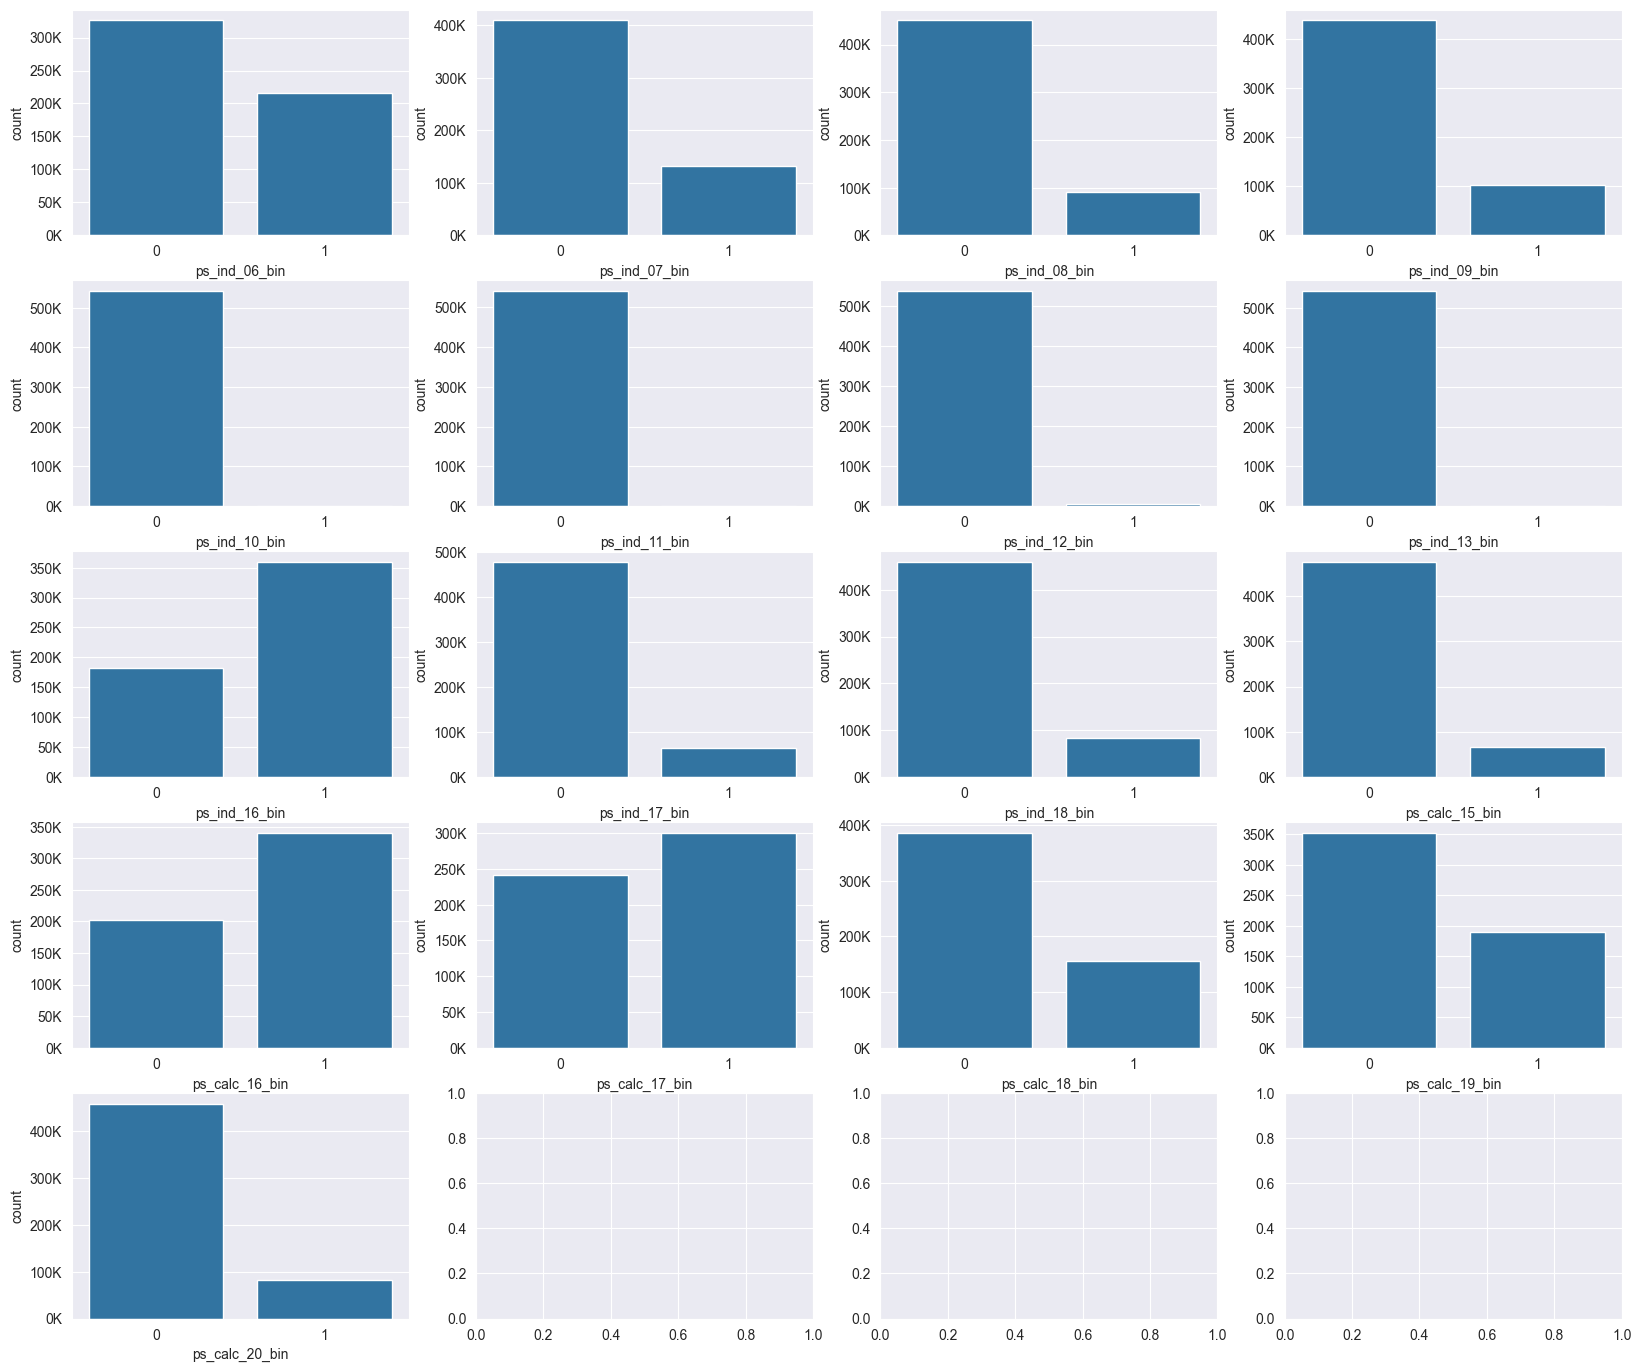

In [33]:
cols_bin = dados_brutos.filter(like='bin', axis=1).columns

n_plot_h = 4
n_plot_v = (len(cols_bin) // n_plot_h) + 1

fig, ax = plt.subplots(nrows=n_plot_v, ncols=n_plot_h, figsize=(20,17))

for i in range(len(cols_bin)):
  plot = sns.countplot(dados_brutos, x=cols_bin[i], ax=ax[i//n_plot_h][i%n_plot_h])
  plot.set_title=(f'Contagem para a coluna {cols_bin[i]}')
  ylabels = ['{:,.0f}'.format(x) + 'K' for x in plot.get_yticks()/1000]
  plot.set_yticklabels(ylabels)

plt.show()

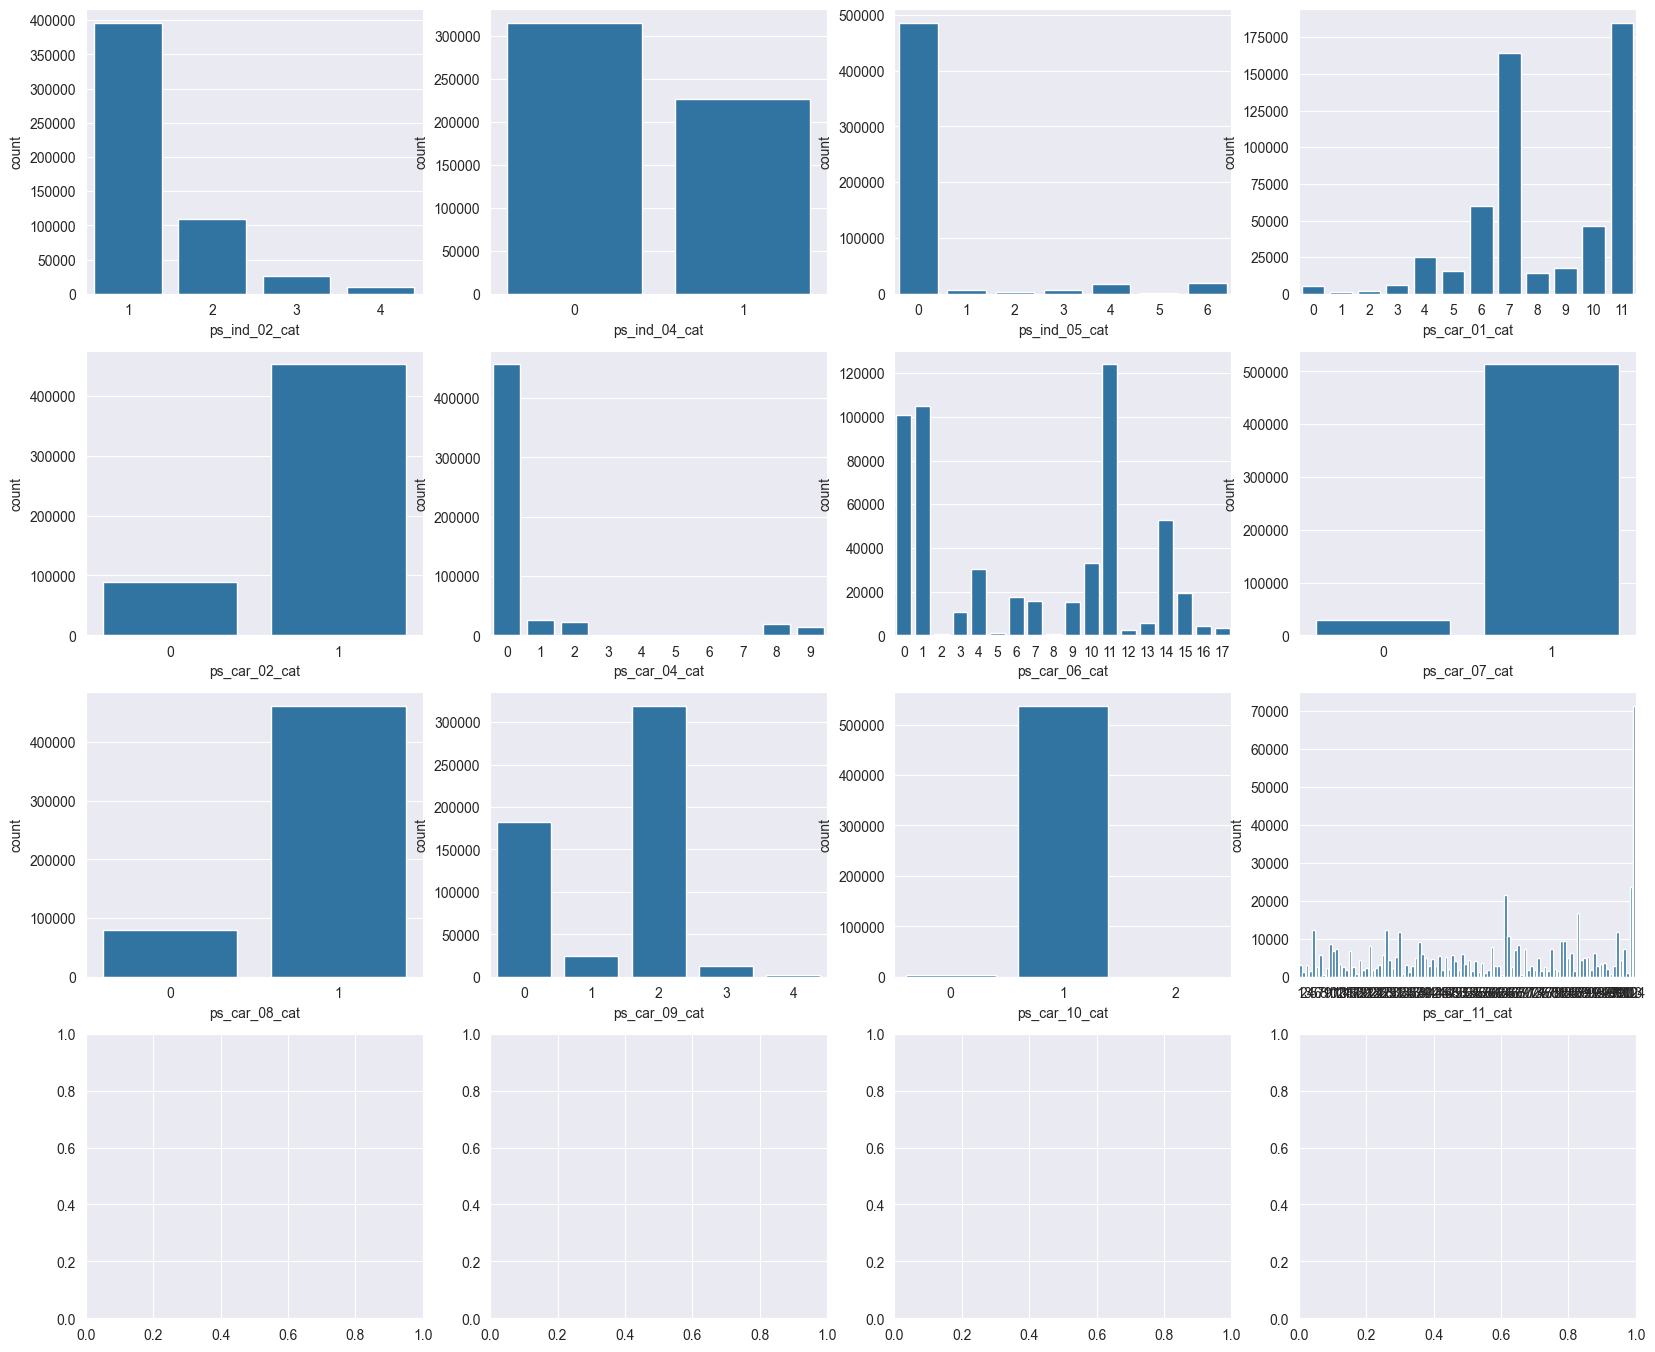

In [34]:
cols_cat = dados_brutos.filter(like='cat', axis=1).columns

n_plot_h = 4
n_plot_v = (len(cols_cat) // n_plot_h) + 1

fig, ax = plt.subplots(nrows=n_plot_v, ncols=n_plot_h, figsize=(20,17))

for i in range(len(cols_cat)):
  plot = sns.countplot(dados_brutos, x=cols_cat[i], ax=ax[i//n_plot_h][i%n_plot_h])
  plot.set_title=(f'Contagem para a coluna {cols_cat[i]}')

plt.show()

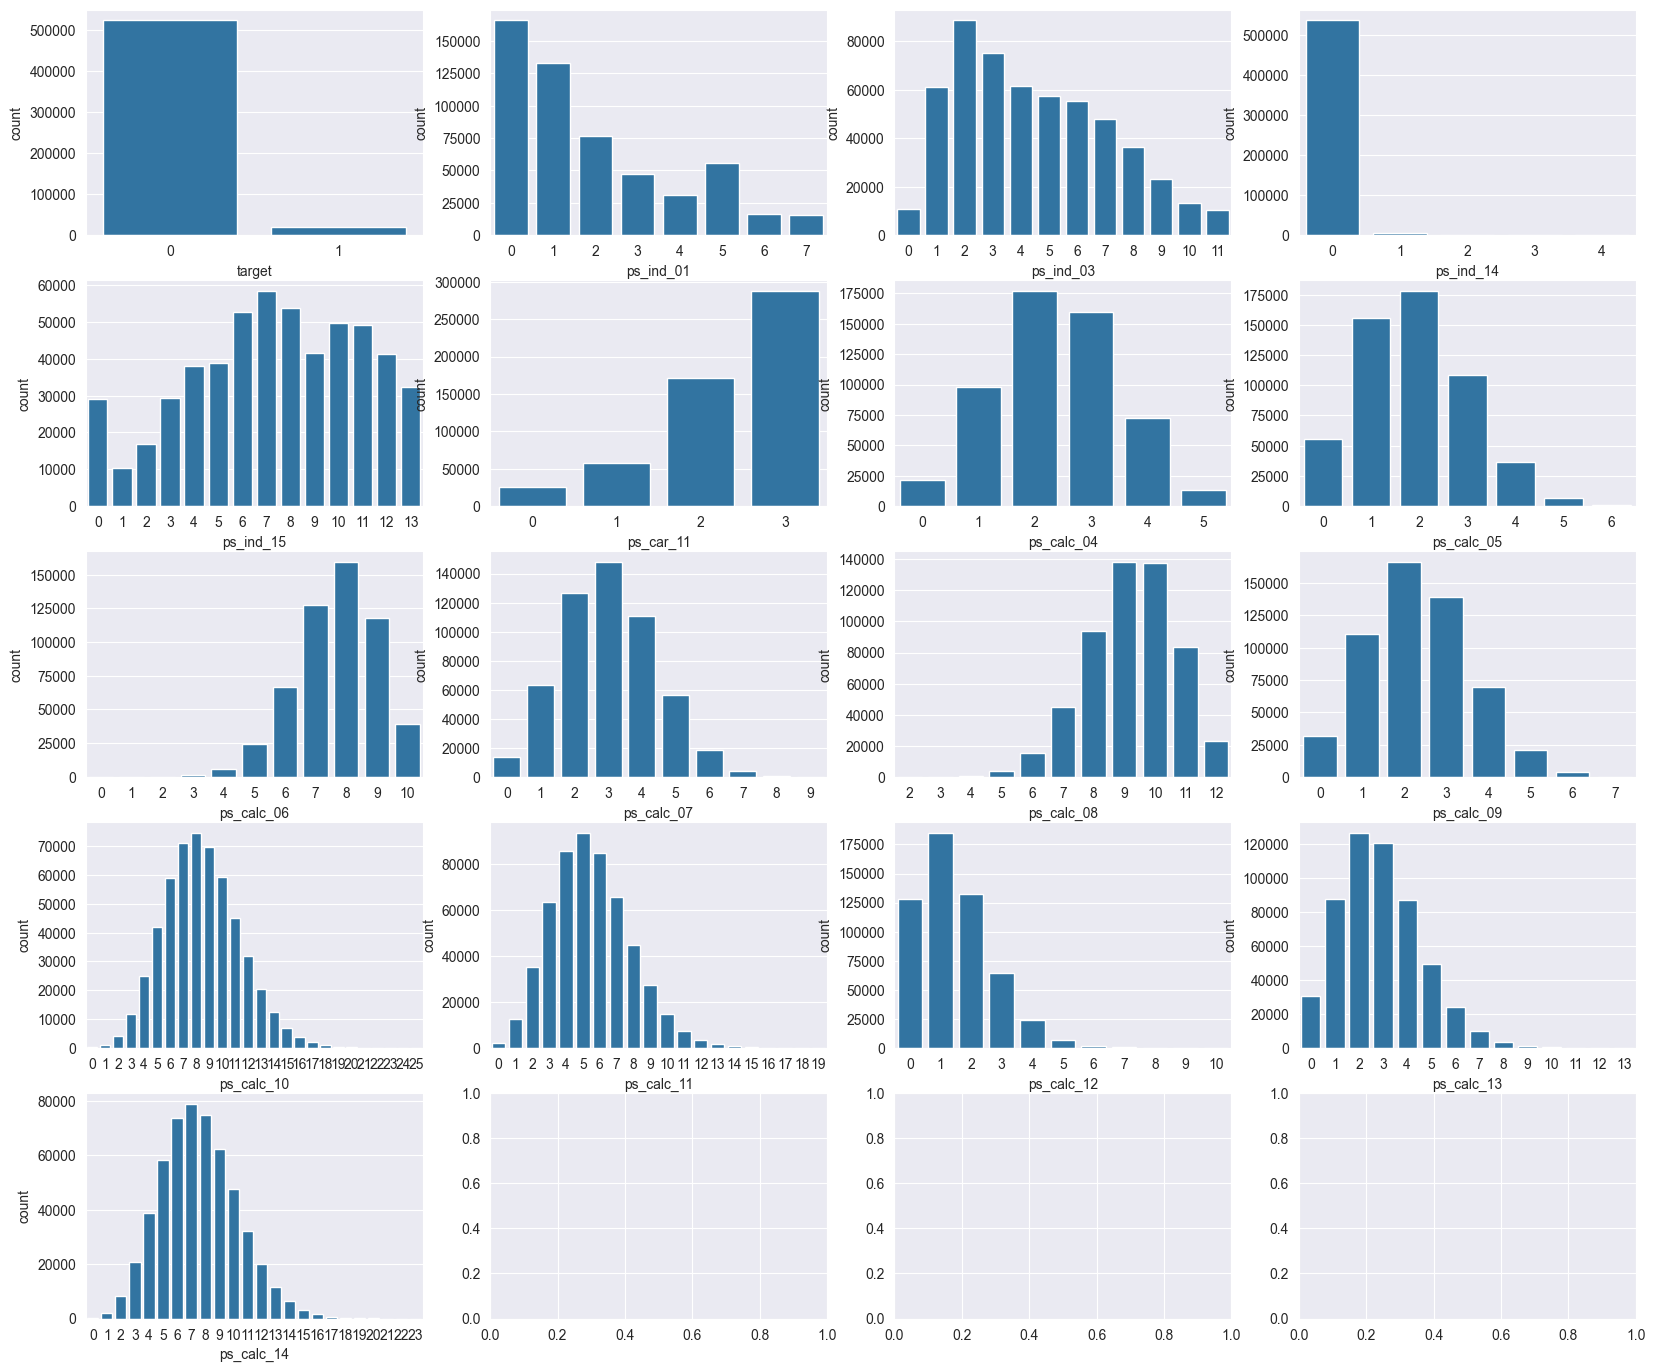

In [35]:
cols_ord = dados_brutos.filter(regex='^(?!.*(_cat|_bin)$).*').select_dtypes(include='int64').columns


n_plot_h = 4
n_plot_v = (len(cols_ord) // n_plot_h) + 1

fig, ax = plt.subplots(nrows=n_plot_v, ncols=n_plot_h, figsize=(20,17))

for i in range(len(cols_ord)):
  plot = sns.countplot(dados_brutos, x=cols_ord[i], ax=ax[i//n_plot_h][i%n_plot_h])
  plot.set_title=(f'Contagem para a coluna {cols_ord[i]}')

plt.show()

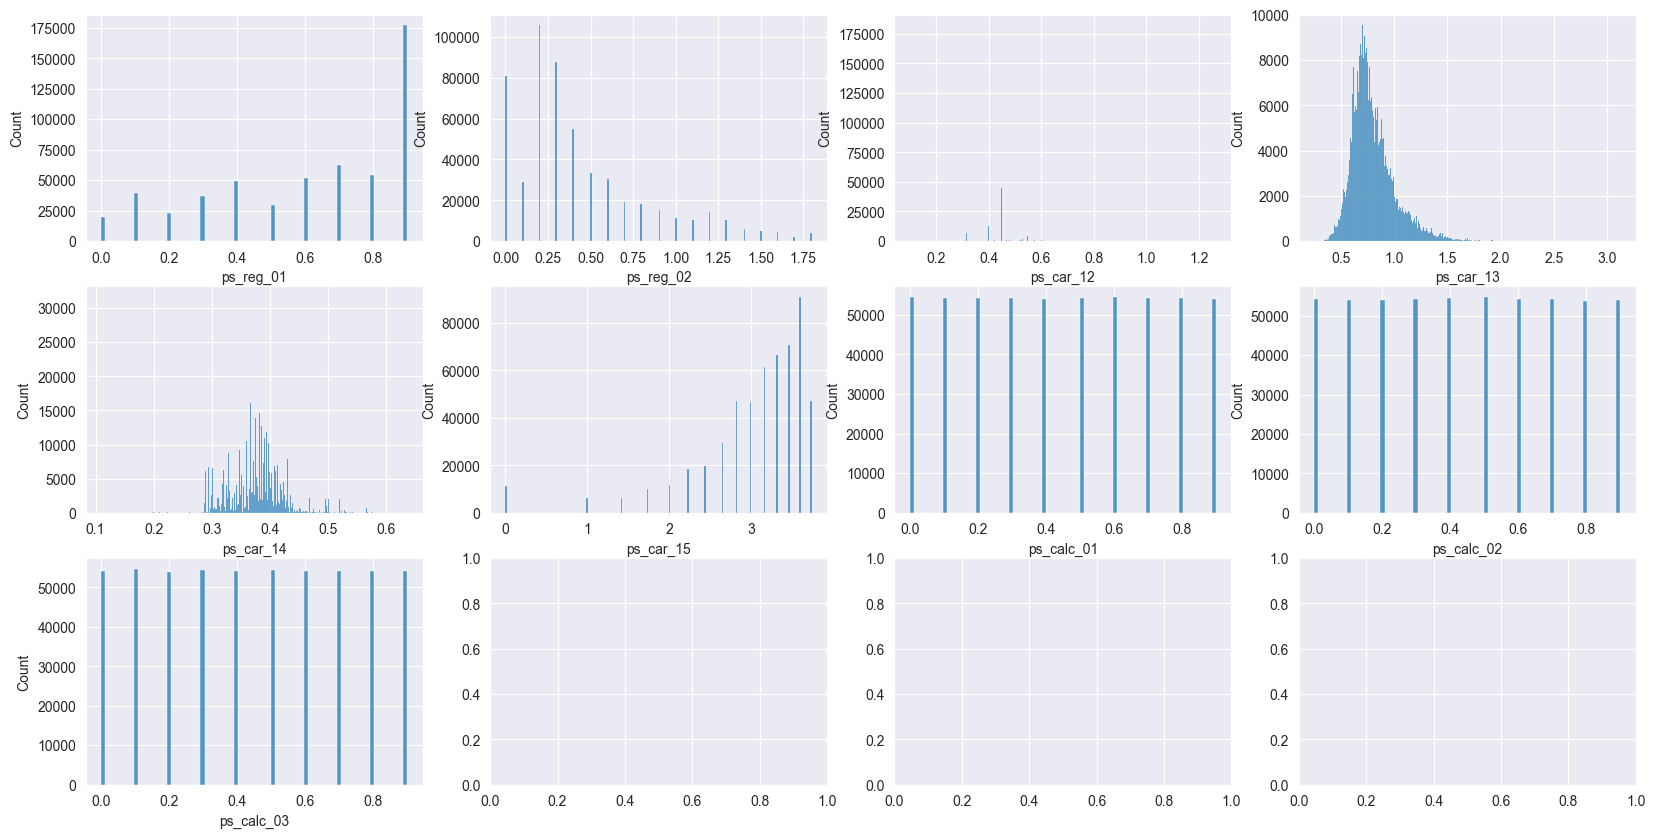

In [36]:
cols_ord = dados_brutos.select_dtypes(include='float64').columns


n_plot_h = 4
n_plot_v = (len(cols_ord) // n_plot_h) + 1

fig, ax = plt.subplots(nrows=n_plot_v, ncols=n_plot_h, figsize=(20,10))

for i in range(len(cols_ord)):
  plot = sns.histplot(dados_brutos, x=cols_ord[i], ax=ax[i//n_plot_h][i%n_plot_h])
  plot.set_title=(f'Contagem para a coluna {cols_ord[i]}')

plt.show()

## Variável Alvo

 - Totalmente desbalanceada

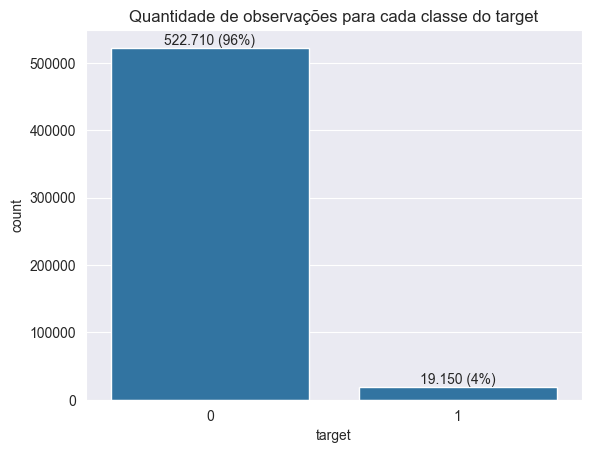

In [37]:
ax = sns.countplot(dados_brutos, x='target')

abs_values = dados_brutos['target'].value_counts(ascending=False)
rel_values = dados_brutos['target'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]:,} ({p[1]:.0f}%)'.replace(',', '.') for p in zip(abs_values, rel_values)]
ax.set_title('Quantidade de observações para cada classe do target')

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.show()

Matriz de correlação

<Axes: >

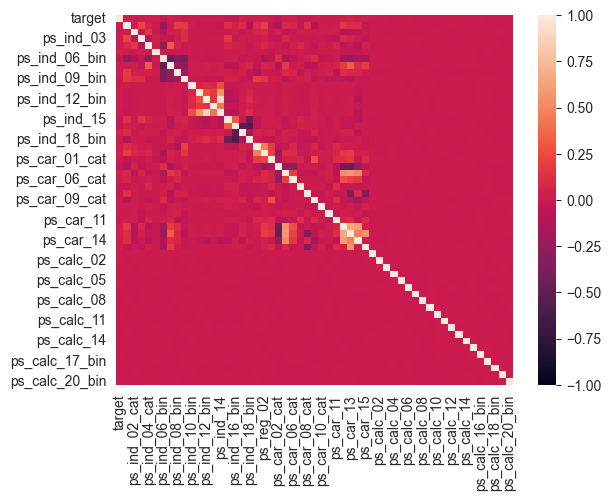

In [38]:
sns.heatmap(dados_brutos.corr(), vmin=-1, vmax=1)